# Working with owslib's WMS interface

[OWSlib](https://geopython.github.io/OWSLib/) is a Python package for client programming with OGC web service interface standards. In this tutorial we'll work with the WMS interface. 

In [1]:
from owslib.wms import WebMapService

## Web Mapping Service

We start by fetching a map using the WMS protocol. We first instantiate a `WebMapService` object using the address of the NASA server, then browse through its content. 

In [2]:
wms = WebMapService('https://neowms.sci.gsfc.nasa.gov/wms/wms')
print("Title: ", wms.identification.title)
print("Type: ", wms.identification.type)
print("Operations: ", [op.name for op in wms.operations])
print("GetMap options: ", wms.getOperationByName('GetMap').formatOptions)
wms.contents.keys()

Title:  NASA Earth Observations (NEO) WMS
Type:  OGC:WMS
Operations:  ['GetCapabilities', 'GetMap']
GetMap options:  ['image/png', 'image/jpeg']


odict_keys(['MOD14A1_M_FIRE', 'MOD14A1_E_FIRE', 'MOD14A1_D_FIRE', 'MODAL2_M_AER_OD', 'MYDAL2_M_AER_OD', 'MODAL2_E_AER_OD', 'MYDAL2_E_AER_OD', 'MODAL2_D_AER_OD', 'MYDAL2_D_AER_OD', 'MODAL2_M_AER_RA', 'MYDAL2_M_AER_RA', 'MODAL2_E_AER_RA', 'MYDAL2_E_AER_RA', 'MODAL2_D_AER_RA', 'MYDAL2_D_AER_RA', 'MCD43C3_M_BSA', 'MCD43C3_E_BSA', 'MOD_LSTD_CLIM_M', 'MOD_LSTD_CLIM_E', 'MOD_LSTN_CLIM_M', 'MOD_LSTN_CLIM_E', 'AVHRR_CLIM_M', 'AVHRR_CLIM_W', 'GEBCO_BATHY', 'BlueMarbleNG', 'BlueMarbleNG-TB', 'MOP_CO_M', 'MY1DMM_CHLORA', 'MY1DMW_CHLORA', 'MODAL2_M_CLD_FR', 'MYDAL2_M_CLD_FR', 'MODAL2_E_CLD_FR', 'MYDAL2_E_CLD_FR', 'MODAL2_D_CLD_FR', 'MYDAL2_D_CLD_FR', 'MODAL2_M_CLD_OT', 'MYDAL2_M_CLD_OT', 'MODAL2_E_CLD_OT', 'MYDAL2_E_CLD_OT', 'MODAL2_D_CLD_OT', 'MYDAL2_D_CLD_OT', 'MODAL2_M_CLD_RD', 'MYDAL2_M_CLD_RD', 'MODAL2_E_CLD_RD', 'MYDAL2_E_CLD_RD', 'MODAL2_D_CLD_RD', 'MYDAL2_D_CLD_RD', 'MODAL2_M_CLD_WP', 'MYDAL2_M_CLD_WP', 'MODAL2_E_CLD_WP', 'MYDAL2_E_CLD_WP', 'MODAL2_D_CLD_WP', 'MYDAL2_D_CLD_WP', 'MOD_721D_RR

The `content` is a dictionary holding metadata for each layer. We'll print some of the metadata' title for a couple of layers to see what's in it. 

In [3]:
for key in ['MOD14A1_M_FIRE', 'CERES_LWFLUX_M', 'ICESAT_ELEV_G', 'MODAL2_M_CLD_WP', 'MOD_143D_RR']:
    print(wms.contents[key].title)

Active Fires (1 month - Terra/MODIS)
Outgoing Longwave Radiation (1 month)
Greenland / Antarctica Elevation
Cloud Water Content (1 month - Terra/MODIS)
True Color (1 day - Terra/MODIS)


We'll select the true color Earth imagery from Terra/MODIS. Let's check out some of its properties. We can also pretty print the full abstract with HTML. 

In [4]:
from IPython.core.display import HTML

name = 'MOD_143D_RR'
layer = wms.contents[name]
print("Abstract: ", layer.abstract)
print("BBox: ", layer.boundingBoxWGS84)
print("CRS: ", layer.crsOptions)
print("Styles: ", layer.styles)
print("Timestamps: ", layer.timepositions)
HTML(layer.parent.abstract)

Abstract:  None
BBox:  (-180.0, -90.0, 180.0, 90.0)
CRS:  ['EPSG:4326']
Styles:  {}
Timestamps:  ['2006-09-01/2006-09-14/P1D', '2006-09-17/2006-10-10/P1D', '2006-10-12/2006-11-18/P1D', '2006-11-21/2007-03-01/P1D', '2007-03-03/2007-08-16/P1D', '2007-08-18', '2007-08-20/2007-09-11/P1D', '2007-09-15/2007-12-30/P1D', '2008-01-01/2008-01-24/P1D', '2008-01-27/2008-02-24/P1D', '2008-02-26/2008-03-18/P1D', '2008-03-20/2008-06-12/P1D', '2008-06-14', '2008-06-16/2008-07-12/P1D', '2008-07-14/2008-09-17/P1D', '2008-09-19', '2008-09-22/2008-10-17/P1D', '2008-10-19/2008-10-22/P1D', '2008-10-28/2008-12-02/P1D', '2008-12-04/2008-12-20/P1D', '2008-12-23/2008-12-30/P1D', '2009-01-01/2009-01-20/P1D', '2009-01-22/2009-04-19/P1D', '2009-04-23/2009-07-05/P1D', '2009-07-08/2009-12-30/P1D', '2010-01-01/2010-07-16/P1D', '2010-07-18/2010-12-07/P1D', '2010-12-09/2010-12-30/P1D', '2011-01-01/2011-01-25/P1D', '2011-01-27/2011-03-19/P1D', '2011-03-21/2011-07-23/P1D', '2011-07-27/2011-08-27/P1D', '2011-08-30/2011-12

## Getting the image data

Now let's get the image ! The response we're getting is a `ResponseWrapper` object, we need to `read` its content to get the actual bytes for the png file. Let's first display the raw image, then try to map it onto a projection of the Earth. 

In [5]:
response = wms.getmap(layers=[name,], 
                 styles=['rgb'], 
                 bbox=(-180, -90, 180, 90), # Left, bottom, right, top
                 format='image/png', 
                 size=(600,600), 
                 srs='EPSG:4326',
                 time='2018-09-16', 
                 transparent=True)
response

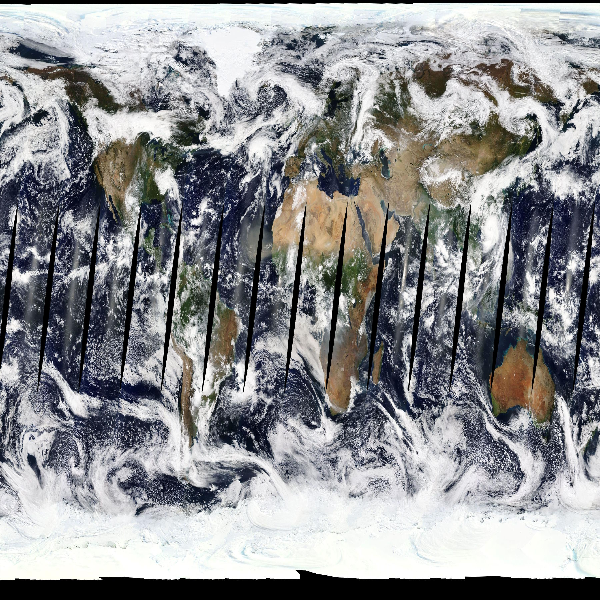

In [6]:
from IPython.display import Image
Image(response.read())

## Plotting the image on a map

Using the `cartopy` library, we'll overlay the image on a map of the Earth. Since Matplotlib's `imread` function expects a file-like object, we'll mimic a file object in memory using the `io.BytesIO` function.

In [7]:
import io
import cartopy
import matplotlib.pyplot as plt
import warnings
image = io.BytesIO(response.read())
data = plt.imread(image)

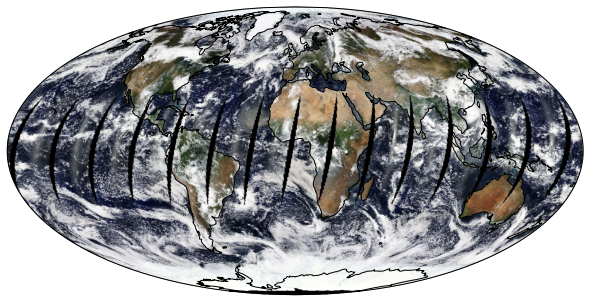

In [8]:
warnings.filterwarnings('ignore', category=cartopy.io.DownloadWarning)
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1], projection=cartopy.crs.Mollweide())
ax.imshow(data, origin="upper", extent=(-180, 180, -90, 90),
          transform=cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()